In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.spatial.distance import cosine as dcos
from sympy import *
x = Symbol('x')
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [30]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
users10 = []
for u1 in range(raitings.shape[0]):
    users10.append([u1,-1,1])
    for u2 in range(raitings.shape[0]):
        if u1 != u2:
            similarity = dcos(raitings[u1], raitings[u2])
            if similarity < users10[u1][2]:
                users10[u1][1] = u2
                users10[u1][2] = similarity
rdata = pd.DataFrame(users10, columns = ['user ', 'similiar user', 'distance'])
rdata


,user,similiar user,distance
0,0,8,0.089340
1,1,4,0.128619
2,2,9,0.081269
3,3,9,0.141131
4,4,8,0.120515
5,5,9,0.144851
6,6,3,0.167258
7,7,5,0.155483
8,8,0,0.089340
9,9,2,0.081269


In [32]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5)
raitings_zip = svd.fit_transform(raitings)
print(raitings_zip)

[[23.41982063 -5.36092136  3.83196779 -4.06950174  1.10267269]
 [24.76774917  4.52188701  1.35815965  1.58128545  8.59912002]
 [22.27728589 -6.96492049 -4.84461485 -0.47661647  3.37152266]
 [19.4257757   2.64575227 -6.86014009 -4.76604765  1.96075707]
 [22.8146354   0.51464093  7.70180188  4.42379773  1.29124163]
 [21.76961656  1.94294987 -4.56934779  8.32306487 -2.21887359]
 [21.23427453  9.78047778  1.16340271 -4.86074521 -2.60815471]
 [19.97476815  4.00048677 -1.67456316  1.1512346  -3.5637169 ]
 [26.39306998 -3.03090482  5.86422753 -1.67503491 -3.71500141]
 [29.94016844 -4.82012297 -3.48912415  0.05527083 -3.62526487]]


### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [6]:
f = (tan(sin(x)+cos(2*x+3)))**2
diff(f).subs(x,1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [10]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [11]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [12]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

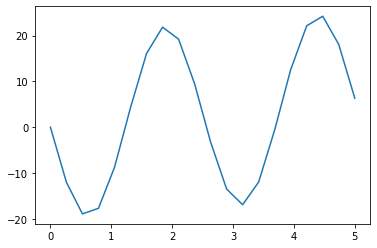

In [13]:
plt.plot(x, fx)
plt.show()

In [14]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Optimization terminated successfully.
         Current function value: 0.000139
         Iterations: 45
         Function evaluations: 91
 final_simplex: (array([[ 2.9999999 , -2.49999979],
       [ 2.9999996 , -2.50000014],
       [ 3.00000077, -2.49999986]]), array([0.00013904, 0.00014849, 0.0002241 ]))
           fun: 0.00013904353049909446
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 45
        status: 0
       success: True
             x: array([ 2.9999999 , -2.49999979])


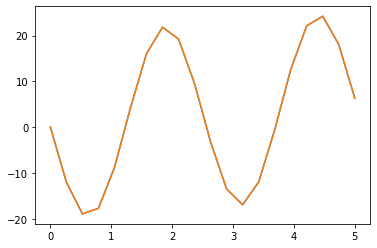

a=2.999999898370497
b=-2.4999997914334697


In [54]:
res = minimize(error, [3,  -3], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
print(res)
a = res['x'][0]
b = res['x'][1]
plt.plot(x, fx)
plt.plot(x, f(x, a, b))
plt.show()
print(f'a={a}\nb={b}')

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

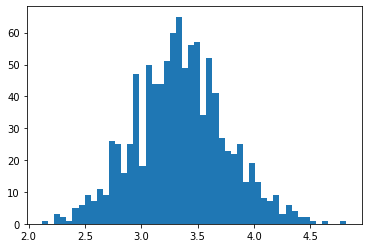

In [35]:
el = np.random.randint(0, 10, 20)
s = np.random.random(20)
mn = np.array([])
for i in range(1000):
    n = np.mean(np.random.choice(el, 50, p=s / sum(s)))
    mn = np.append(mn,n)
plt.hist(mn, 50)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [24]:
z = np.array([[1, 4],
              [1, 1]])
v, vec = np.linalg.eig(z)
print(f'собственные значения\n {v},\n\nсобственные вектора \n{vec}')

собственные значения
 [ 3. -1.],

собственные вектора 
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
